In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Base Model Level-Level

In [263]:
beef = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/beef.csv')


In [264]:
from __future__ import print_function
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [265]:
beef_model = ols("Quantity ~ Price", data=beef).fit()
print(beef_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.69e-46
Time:                        08:34:56   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

<AxesSubplot:xlabel='Price', ylabel='Quantity'>

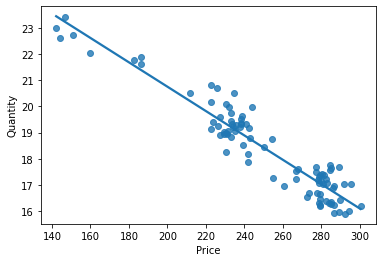

In [266]:
sns.regplot(x=beef['Price'], y=beef['Quantity'],ci=False)


In [267]:
beef['fitted'] = beef_model.fittedvalues
beef['residuals'] = beef['Quantity'] - beef['fitted']

In [268]:
# Import packages
from statsmodels.stats.diagnostic import acorr_ljungbox

# Carry out Ljung-Box test
print(acorr_ljungbox(beef['residuals'], return_df=True))

       lb_stat     lb_pvalue
1     4.169223  4.116467e-02
2    15.715308  3.867803e-04
3    18.071411  4.251821e-04
4    57.309852  1.065174e-11
5    57.312661  4.359503e-11
6    76.632158  1.769822e-14
7    77.667687  4.113841e-14
8   107.607379  1.180515e-19
9   107.731349  4.255840e-19
10  126.926796  1.976413e-22


In [269]:
beef['residuals'].mean()

-1.8739588635431214e-15

#### Ljung Box Test is not suitable for OLS

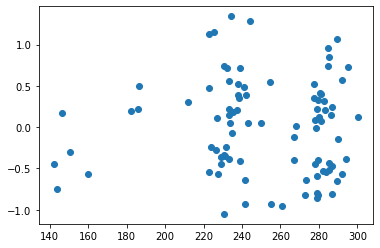

In [270]:
plt.scatter(x='Price',y='residuals', data=beef)

### Calculate Price Elasticities

In [271]:
mean_price = beef['Price'].mean()
mean_quantity = beef['Quantity'].mean()
slope = beef_model.params[1]
p_elasticity = slope * (mean_price/mean_quantity)
p_elasticity

/var/folders/l0/nq5ggf593ms2yg8yn6z63h_r0000gn/T/ipykernel_9976/3086661295.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = beef_model.params[1]


-0.6329392811763698

## Model Log-Log

In a log-log setting, the price elasticity of demand is the slope coefficient

In [272]:
beef = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/beef.csv')
beef['Log_Price'] = np.log(beef['Price'])
beef['Log_Quantity'] = np.log(beef['Quantity'])

beef_model = ols("Log_Quantity ~ Log_Price", data=beef).fit()
print(beef_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Log_Quantity   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     512.6
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.07e-38
Time:                        08:35:00   Log-Likelihood:                 171.64
No. Observations:                  91   AIC:                            -339.3
Df Residuals:                      89   BIC:                            -334.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8364      0.129     45.101      0.0

In [276]:
beef['fitted_log'] = beef_model.fittedvalues
beef['residuals_log'] = beef['Log_Quantity'] - beef['fitted_log']
beef.head()

,Year,Quarter,Quantity,Price,Log_Price,Log_Quantity,fitted_log,residuals_log
0,1977,1,22.9976,142.1667,4.957000,3.135390,3.202103,-0.066714
1,1977,2,22.6131,143.9333,4.969350,3.118529,3.195541,-0.077011
2,1977,3,23.4054,146.5000,4.987025,3.152967,3.186147,-0.033181
3,1977,4,22.7401,150.8000,5.015954,3.124130,3.170774,-0.046644
4,1978,1,22.0441,160.0000,5.075174,3.093045,3.139303,-0.046258


#### The demand of the product is inelastic, since it lies between [-1,1]
#### Negative price elasticity indicates that increasing prices lead to decreasing demand

In [277]:
beef['residuals_log'].mean()

-6.97854472621527e-16

In [280]:
import statsmodels
from statsmodels.stats.stattools import durbin_watson

statsmodels.stats.stattools.durbin_watson(beef['residuals_log'], axis=0)

1.1073450088969268

#### We have 91 observations and 2 regressors --> critical value: d_lower = 1.6, d_upper = 1.7
DW < d_L --> positive autocorrelation detected

### Use Generalized Least Squares

In [284]:
gls_model = sm.GLS(endog=beef['Log_Quantity'], exog=beef['Log_Price'])
res = gls_model.fit()
print(res.summary())

                                 GLS Regression Results                                
Dep. Variable:           Log_Quantity   R-squared (uncentered):                   0.996
Model:                            GLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.363e+04
Date:                Wed, 04 Oct 2023   Prob (F-statistic):                   9.69e-111
Time:                        08:49:20   Log-Likelihood:                          27.318
No. Observations:                  91   AIC:                                     -52.64
Df Residuals:                      90   BIC:                                     -50.13
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Improved R2, and Model significance much higher: F-statistic

## Impact of year dummies

In [257]:
beef = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/beef.csv')
beef = pd.get_dummies(beef, columns=['Year'], drop_first=True, dtype=int)

X = beef.loc[:,'Price':]
X = sm.add_constant(X)
y = beef.Quantity

In [258]:
beef_model = sm.OLS(y, X).fit()

In [260]:
print(beef_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     40.04
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.54e-30
Time:                        07:53:39   Log-Likelihood:                -60.347
No. Observations:                  91   AIC:                             168.7
Df Residuals:                      67   BIC:                             229.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2648      1.803     14.012      0.0